# Data Project - Stock Market Analysis
Welcome to your second data project! 

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular stock?

7.) How can we attempt to predict future stock behavior?


# Basic Analysis of Stock Information

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [3]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [5]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,53.016479
2019-09-10,54.195000,52.927502,53.465000,54.174999,127111600.0,53.642761
2019-09-11,55.927502,54.432499,54.517502,55.897499,177158400.0,55.348343
2019-09-12,56.605000,55.715000,56.200001,55.772499,128906800.0,55.224567
2019-09-13,55.197498,54.255001,55.000000,54.687500,159053200.0,54.150230


In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,78.620591,76.612234,77.549567,77.727317,1.451738e+08,77.392824
std,18.517119,17.779188,18.263460,18.171876,6.778965e+07,18.315573
min,54.110001,52.767502,53.465000,53.542500,4.661760e+07,53.016479
25%,65.781872,64.291250,64.675625,65.437498,1.009442e+08,64.989147
50%,75.147499,72.343750,73.822498,73.903748,1.275770e+08,73.483952
75%,86.415623,83.109373,83.243126,84.518747,1.676812e+08,84.366631
max,137.979996,130.529999,137.589996,134.179993,4.184740e+08,134.179993


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-09-09 to 2020-09-09
Data columns (total 6 columns):
High         254 non-null float64
Low          254 non-null float64
Open         254 non-null float64
Close        254 non-null float64
Volume       254 non-null float64
Adj Close    254 non-null float64
dtypes: float64(6)
memory usage: 13.9 KB


# 1.) What was the change in price of the stock over time?

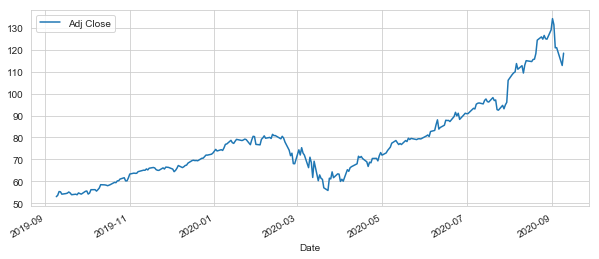

In [8]:
AAPL['Adj Close'].plot(legend= True, figsize=(10,4))

# 2.) What was the daily return of the stock on average?

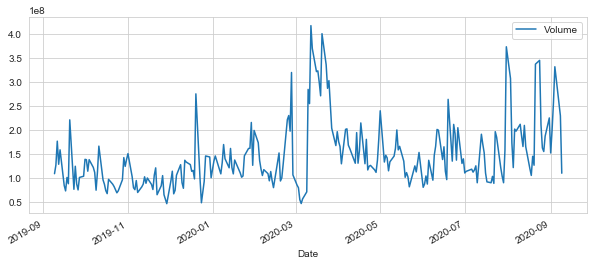

In [9]:
AAPL['Volume'].plot(legend = True, figsize=(10,4))

# 3.) What was the moving average of the various stocks

In [10]:
#For more info on the moving average check out the following
#1.http://www.investopedia.com/terms/m/movingaverage.asp
#2.http://www.investopedia.com/article/active-trading/092019/how-use-moving-average-buy-stocks.asp

In [11]:
#moving average (ma) average value of dta over a particular period of time

ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = (AAPL['Adj Close']).rolling(ma).mean()

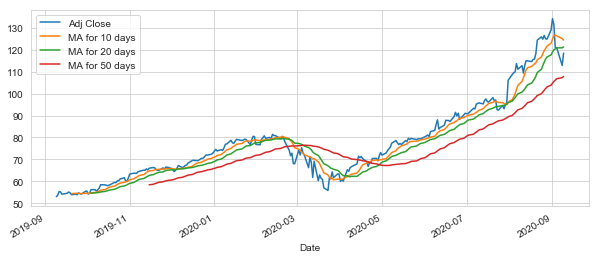

In [12]:
AAPL [['Adj Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

# 4.) What was the correlation between different stocks' closing prices?

# 5.) What was the correlation between different stocks' daily returns?

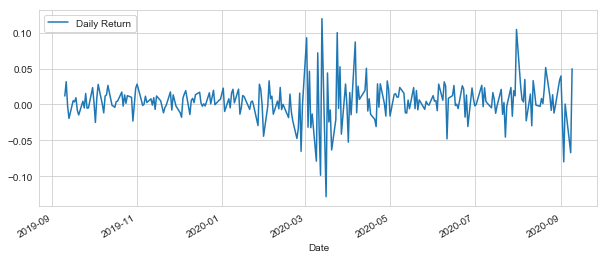

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize= (10,4), legend = True)

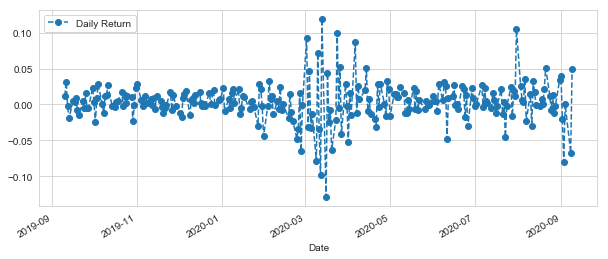

In [14]:
#to make the above more visible
AAPL['Daily Return'].plot(figsize= (10,4), legend = True, linestyle='--', marker='o')

C:\Users\Ife\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


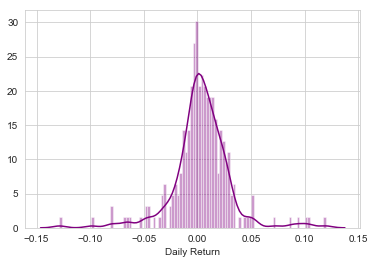

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100, color='purple')

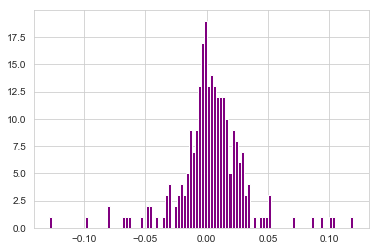

In [16]:
#OR 
AAPL['Daily Return'].hist(bins = 100, color='purple')

In [17]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-09-09,NaN,NaN,NaN,NaN
2019-09-10,0.011813,-0.005897,0.001320,-0.010471
2019-09-11,0.031795,0.001340,0.011750,0.000294
2019-09-12,-0.002236,0.011278,0.011539,0.010285
2019-09-13,-0.019454,-0.002284,0.004302,-0.001454


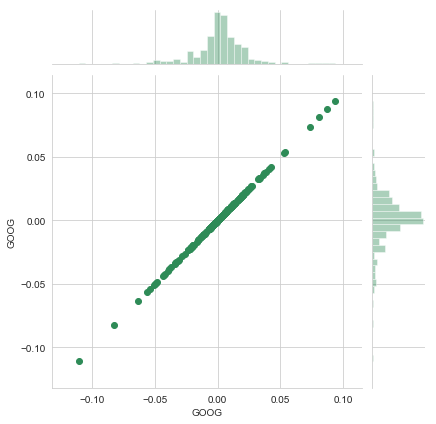

In [23]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

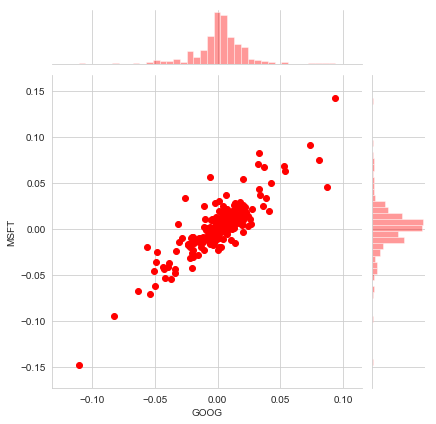

In [24]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='red')

In [25]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-09-09,NaN,NaN,NaN,NaN
2019-09-10,0.011813,-0.005897,0.001320,-0.010471
2019-09-11,0.031795,0.001340,0.011750,0.000294
2019-09-12,-0.002236,0.011278,0.011539,0.010285
2019-09-13,-0.019454,-0.002284,0.004302,-0.001454


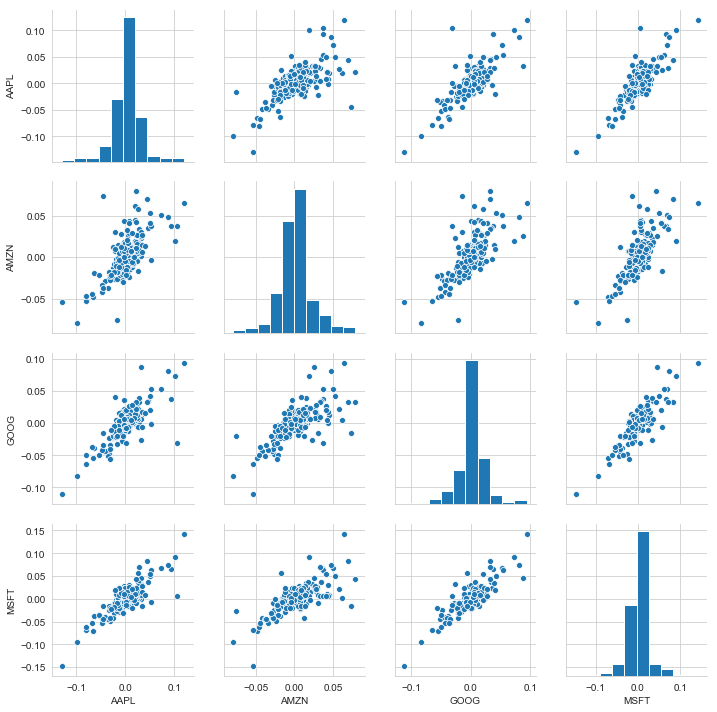

In [26]:
sns.pairplot(tech_rets.dropna())

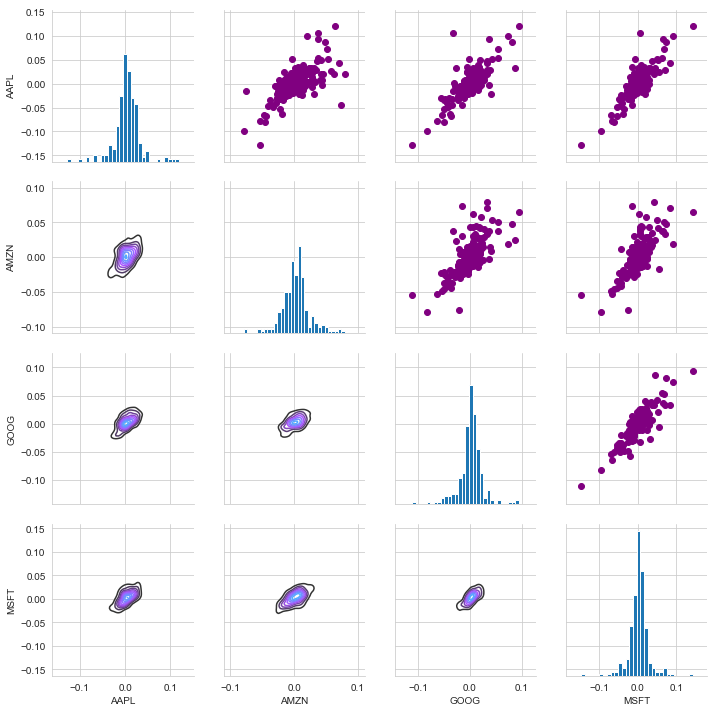

In [35]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

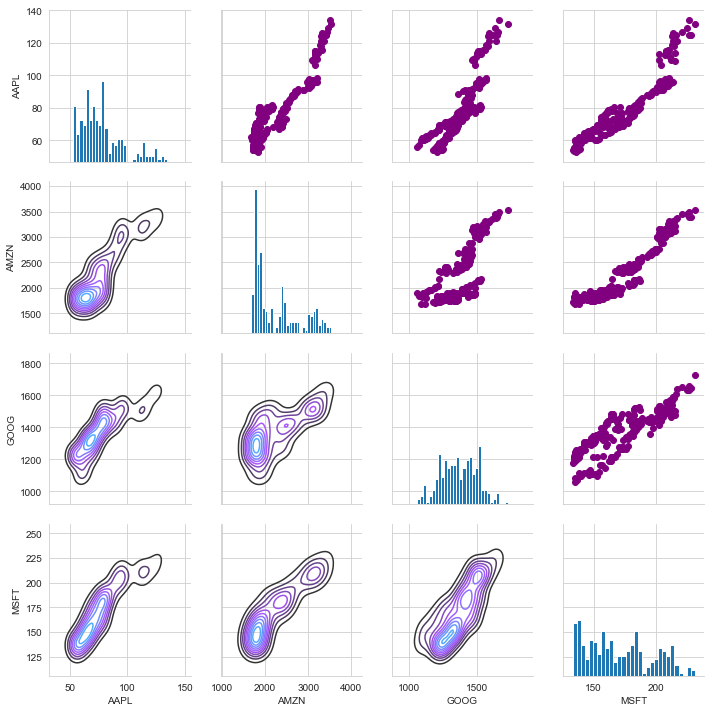

In [28]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

# correlation between different stocks' daily returns??

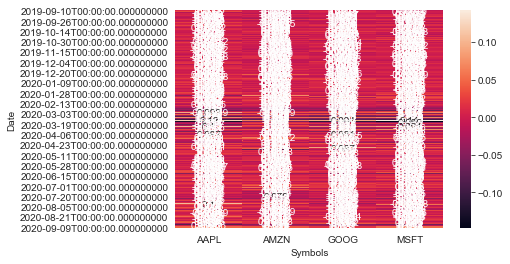

In [32]:
sns.heatmap(tech_rets.dropna(),annot=True)

# correlation between different stocks' closing prices?

TypeError: float() argument must be a string or a number

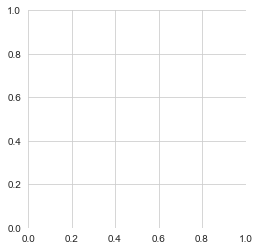

In [70]:
sns.heatmap(closing_df.corr(),closing_df.dropna(),annot=True, linewidths = 0.1, 
            vmax=1.0, square=True, cmap= None, linecolor = 'white')

# 6.) How much value do we put at risk by investing in a particular stock?

In [58]:
rets = tech_rets.dropna()

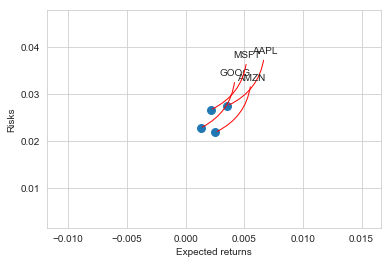

In [62]:
area = np.pi*20

plt.scatter(rets.mean(), rets.std(), s= area)

plt.xlabel('Expected returns')
plt.ylabel('Risks')

#label scatter plots, check link below for more info
#http://matplotlib.org/users/connotations_guide.html
for label, x,y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha= 'right', va='bottom',
        arrowprops = dict(arrowstyle= '-', connectionstyle = 'arc3,rad =-0.3',color='red'))
    

In [ ]:
#to explain our map above, APPLE has the highest 'expected return' on its stock and also a high 'risk', this is because it is 
#expected of apple to have high risk because of its high expected return. same goes for others